### 기본 세팅

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
import matplotlib.pyplot as plt
# 한글 설정
plt.style.use("ggplot")
plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt

### 사용 가능한 Style

In [5]:
 plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

### 파일 불러오고 정류장에 '동양미래대학' 들어간 장소 멈추는 서울버스 불러오기

In [6]:
f1 = open('./data/2024년_버스노선별_정류장별_시간대별_승하차_인원_정보(10월).csv', encoding='cp949')
data1 = csv.reader(f1)
header = next(data1)
data1 = list(data1)
data1 = [row[:-3] for row in data1]
#파일 불러오고, 동양미래대학교 포함 데이터 출력
busnum = set()

for row in data1:
  if('동양미래대학' in row[5]):
    print(row)
    busnum.add(row[1])

busnum = tuple(busnum)

print(len(busnum))

['202410', '6713', '6713번(철산동~홍대입구역)', '116000007', '17007', '동양미래대학.구로성심병원(00062)', '34', '63', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '14', '55', '56', '132', '88', '588', '80', '719', '108', '417', '111', '265', '179', '320', '173', '420', '193', '351', '244', '293', '291', '347', '343', '467', '318', '810', '206', '515', '185', '393', '138', '303', '175', '255', '87', '237']
['202410', '5712', '5712번(가산동~홍대입구역)', '116000007', '17007', '동양미래대학.구로성심병원(00014)', '0', '0', '0', '0', '0', '0', '0', '0', '66', '67', '355', '139', '182', '71', '337', '216', '627', '574', '424', '880', '414', '510', '491', '425', '711', '374', '691', '477', '857', '426', '1057', '454', '1766', '528', '1544', '721', '1263', '911', '1175', '581', '766', '342', '859', '240', '704', '217', '2', '0']
['202410', '6515', '6515번(양천차고지~삼막사거리)', '116000007', '17007', '동양미래대학.구로성심병원(00102)', '93', '125', '9', '12', '0', '0', '0', '0', '0', '0', '0', '0', '2', '16', '43', '98', '124', '355', '108', '453', '1

## 동양미래대학교 앞을 지나는 서울 버스 목록

In [7]:
busnum = sorted(busnum)
for num in busnum:
    print(f"{num}")
    # 동양미래대학이 들어간 정류장을 지나는 버스 출력

160
5626
5712
600
6511
6515
660
662
6637
6640A
6640B
6713
N16
구로06


for row in data:
  for bus in busnum:
    if(row[1] == bus):
      print(row)

In [8]:
buslist = []
for row in data1:
  for bus in busnum:
    if(row[1] == bus):
      buslist.append(row)


In [9]:
busl = []
tmpary1 = []
for val in busnum:
    numgroup = [i for i in buslist if i[1] == val]
    tmpary1.append(numgroup)
    

In [10]:
tmpary2 = []
for val in tmpary1:
    for val2 in val:
        tmpary2.append(val2)
    busl.append(tmpary2)
    tmpary2 = []

#같은 버스 번호끼리 묶어 정렬, 

In [11]:
busdict = {'160': busl[0], '5626': busl[1], '5712': busl[2], '600': busl[3], '6511': busl[4], '6515': busl[5], '660': busl[6], '662': busl[7], '6637': busl[8], '6640A': busl[9], '6640B': busl[10], '6713': busl[11], 'N16': busl[12], '구로06':busl[13]}

### '동양미래대학'이 들어간 정류장을 지나는 버스 번호

In [12]:
print(busnum)

['160', '5626', '5712', '600', '6511', '6515', '660', '662', '6637', '6640A', '6640B', '6713', 'N16', '구로06']


## 버스 정류장 순서를 정류장 번호로 저장후 딕셔너리 저장

In [13]:
bus600 = ["17290", "17185", "17183", "17181", "17179", "17307", "17309", "17315", "17305", "17312", "17218", "17215", "17213", "17211", "17226", "17228", "17008", "17006", "17004", "17002", "19001", "19003", "19005", "19161", "19157", "19284", "14001", "14003", "14005", "14007", "14009", "14100", "13045", "13047", "01007", "01120", "02135", "13137", "14010", "14008", "14006", "14004", "14002", "19008", "19152", "19006", "19004", "19002", "17001", "17003", "17005", "17007", "17227", "17225", "17212", "17214", "17216", "17217", "17311", "17306", "17314", "17304", "17308", "17174", "17248", "17180", "17182", "17184", "17289"]
bus6713=["38073", "38076", "38084", "38078", "38001", "17515", "17209", "17164", "17010", "17008", "17006", "17004", "17002", "19001", "19187", "19234", "19243", "19244", "19249", "19239", "19285", "19301", "20106", "20107", "19153", "19156", "19132", "19131", "14200", "14202", "14205", "13021", "13019", "14016", "14314", "14315", "14015", "14061", "14228", "14204", "14203", "14201", "19280", "19133", "19155", "19154", "19255", "19256", "19871", "19872", "19233", "19241", "19242", "19235", "19186", "19002", "17001", "17003", "17005", "17007", "17009", "17166", "17210", "17552", "38255", "38068", "38071", "38069", "38067"]
bus660 = ["17290", "17185", "17183", "17181", "17179", "17176", "17682", "17697", "17367", "17365", "17370", "17359", "17267", "17712", "17802", "17804", "17458", "17456", "17173", "17171", "17169", "17012", "17010", "17008", "17006", "17004", "17002", "19001", "19003", "19112", "19119", "19437", "19439", "19451", "19453", "19175", "19172", "19216", "19134", "19215", "16245", "16247", "16249", "16252", "16254", "16255", "16258", "16260", "16261", "16264", "16233", "16235", "16237", "16240", "16241", "16256", "16253", "16251", "16855", "16250", "16248", "16450", "16246", "19217", "19218", "19214", "19174", "19452", "19450", "19438", "19436", "19435", "19434", "19821", "19004", "19002", "17001", "17003", "17005", "17007", "17009", "17011", "17170", "17172", "17178", "17806", "17130", "17808", "17809", "17360", "17371", "17369", "17468", "17846", "17177", "17175", "17248", "17180", "17182", "17184", "17289"]
bus5712 = ["18209", "18210", "18114", "17389", "17131", "17134", "17135", "17137", "17139", "17142", "17310", "17005", "17007", "17227", "17225", "15231", "15230", "15233", "15232", "15251", "15282", "15288", "16191", "16193", "16196", "16197", "16203", "16206", "16146", "16143", "16142", "16139", "16008", "16006", "16004", "16002", "19217", "19218", "19214", "19846", "14011", "14013", "14015", "14016", "14014", "14012", "19848", "19216", "19134", "19215", "16001", "16003", "16005", "16007", "16140", "16141", "16144", "16145", "16205", "16204", "16198", "16707", "16195", "16194", "16201", "16192", "16186", "15310", "15224", "15303", "15302", "15308", "15225", "15412", "17223", "17226", "17228", "17008", "17006", "17143", "17141", "17140", "17138", "17136", "17133", "17132", "18227", "18226"]
bus5626 = ["10195", "56018", "56014", "56015", "56011", "56608", "56010", "56001", "56006", "57042", "57025", "57003", "09146", "57001", "57009", "57017", "57006", "57019", "57005", "57048", "57050", "57605", "18777", "18013", "18011", "18009", "18007", "18005", "18003", "18149", "18147", "17230", "17249", "17389", "17131", "17134", "17135", "17137", "17113", "17293", "17145", "17005", "17007", "17009", "17011", "17170", "17172", "17174", "17248", "17180", "17182", "17184", "17289", "17185", "17183", "17181", "17179", "17173", "17171", "17169", "17235", "17218", "17215", "17219", "17220", "17012", "17010", "17008", "17006", "17144", "17112", "17138", "17136", "17133", "17132", "18151", "18118", "18119", "18002", "18004", "18006", "18008", "18010", "18012", "18014", "18776", "57604", "57055", "57051", "57015", "57014", "57010", "57008", "57023", "09237", "57024", "56005", "56007", "56004", "56009", "10193", "56021", "56028", "56012", "56017", "56019"]
bus6637=["38254", "38235", "38234", "38233", "38058", "38775", "38060", "38053", "38051", "38049", "38032", "38031", "38021", "38016", "38011", "38007", "17207", "17209", "17164", "17010", "17008", "17006", "17004", "17002", "19001", "19003", "19112", "19119", "19162", "19167", "19168", "19183", "15156", "15155", "15148", "15106", "15107", "15108", "15159", "15163", "15164", "15165", "15151", "15152", "15153", "15154", "15158", "19171", "19169", "19163", "19118", "19821", "19004", "19002", "17001", "17003", "17005", "17007", "17009", "17166", "17210", "17208", "38005", "38006", "38008", "38026", "38025", "38029", "38034", "38052", "38057", "38059", "38056", "38230", "38229", "38250", "38231", "38249"]
bus6515 = ['15718', '15320', '15229', '15227', '15226', '15225', '15412', '17223', '17226', '17228', '17008', '17006', '17004', '17002', '19001', '19003', '19005', '19279', '19300', '19226', '19015', '20007', '20111', '20240', '20190', '20192', '20151', '20150', '20147', '20186', '20188', '21151', '21152', '21262', '21118', '21119', '21120', '21139', '21140', '21141', '21374', '21376', '21142', '21143', '21144', '21165', '21166', '21167', '21168', '21169', '21170', '21171', '21172', '18136', '18138', '57602', '18139', '18137', '21173', '21174', '21175', '21176', '21177', '21178', '21179', '21180', '21157', '21158', '21159', '21128', '21373', '21129', '21130', '21252', '21121', '21164', '21103', '21104', '21105', '21106', '21107', '21261', '21149', '21150', '21263', '20187', '20148', '20149', '20193', '20191', '20010', '20008', '19430', '19227', '19225', '19106', '19821', '19004', '19002', '17001', '17003', '17005', '17007', '17227', '17225', '17212', '17214', '17216', '17217', '15228', '15362', '15373']
bus160 = ['10340', '10001', '10003', '10005', '10007', '10019', '10009', '10011', '10013', '10015', '10017', '09001', '09013', '09003', '09005', '09007', '09009', '09011', '08001', '08003', '08005', '08007', '08009', '01005', '01003', '01002', '01198', '01018', '01016', '01014', '01012', '01010', '01008', '01006', '13046', '14010', '14008', '14006', '14004', '14002', '19008', '19152', '19006', '19004', '19002', '17001', '17003', '17005', '17007', '17009', '17011', '17170', '17172', '17174', '17248', '17180', '17182', '17184', '17290', '17185', '17183', '17181', '17179', '17173', '17171', '17169', '17012', '17010', '17008', '17006', '17004', '17002', '19001', '19003', '19005', '19161', '19007', '19284', '14001', '14003', '14005', '14007', '14009', '13045', '13047', '01007', '01009', '01011', '01013', '01015', '01017', '01019', '01205', '01204', '01219', '01220', '01229', '08010', '08008', '08006', '08004', '08002', '09012', '09010', '09008', '09006', '09004', '09002', '10018', '10016', '10014', '10012', '10010', '10020', '10008', '10006', '10004', '10002', '10341']
bus6640A=['15718', '15320', '15229', '15227', '15226', '15234', '15196', '15195', '15194', '15193', '15172', '15171', '15170', '15173', '19204', '19203', '19166', '19163', '19118', '19821', '19004', '19002', '17001', '17003', '17005', '17007', '17009', '17011', '17170', '17172', '17206', '17204', '17600', '17397', '17701', '17986', '17987', '17975', '17700', '17473', '17196', '17801', '17188', '17190', '17192', '17195', '15321', '15373']
bus6640B =['15718', '15322', '17194', '17193', '17191', '17189', '17704', '17197', '17982', '17848', '17984', '17985', '17201', '17399', '17202', '17203', '17205', '17173', '17171', '17169', '17012', '17010', '17008', '17006', '17004', '17002', '19001', '19003', '19112', '19119', '19162', '19165', '17205', '17173', '17171', '17169', '17012', '17010', '17008', '17006', '17004', '17002', '19001', '19003', '19112', '19119', '19162', '19165', '19202', '19205', '15261', '15262', '15263', '15257', '15256', '15236', '15235', '15185', '15304', '15305', '15309', '15362', '15373']
bus6511 =['15227', '15226', '15225', '15412', '17223', '17226', '17228', '17008', '17006', '17152', '17106', '17108', '17107', '17105', '17103', '17102', '17104', '17106', '17863', '17932', '17717', '17114', '19264', '19265', '19266', '19267', '19268', '20209', '20207', '21360', '21226', '21228', '21229', '21231', '21232', '21190', '21191', '21192', '21193', '21194', '21195', '21196', '21137', '21368', '21139', '21140', '21141', '21374', '21128', '21373', '21129', '21130', '21131', '21197', '21198', '21251', '21200', '21201', '21202', '21203', '21233', '21230', '21227', '20208', '20210', '19260', '19261', '19262', '19271', '19270', '17115', '17297', '17293', '17240', '17105', '17103', '17101', '17401', '17107', '17105', '17003', '17005', '17007', '17227', '17225', '15231', '15230', '15304', '15305']
bus662 =['16408', '15348', '15351', '15334', '15332', '15338', '15315', '15353', '15328', '15326', '15416', '15419', '15421', '15423', '15399', '15323', '15325', '15327', '15331', '15316', '15317', '17236', '17012', '17010', '17008', '17006', '17004', '17002', '19001', '19003', '19005', '19161', '19007', '19284', '19139', '19160', '19282', '19008', '19152', '19006', '19004', '19002', '17001', '17003', '17005', '17007', '17009', '17011', '17168', '17235', '15228', '15362', '15378', '15363', '15399', '15323', '15416', '15419', '15421', '15423', '15399', '15323', '15325', '15329', '15354', '15298', '15339', '15333', '15335', '15344', '15349', '16151', '16154', '16152']
busN16 =['10340', '10001', '10003', '10005', '10007', '10019', '10009', '10011', '10013', '10015', '10017', '09001', '09013', '09003', '09005', '09007', '09009', '09011', '08001', '08003', '08005', '08007', '08009', '01228', '01221', '01222', '01225', '01215', '01214', '02173', '02170', '02206', '02208', '02154', '02151', '02234', '02145', '02122', '02128', '02286', '02131', '02116', '02106', '02103', '02102', '02101', '14145', '14144', '14141', '14002', '19008', '19152', '19006', '19004', '19002', '17001', '17003', '17005', '17007', '17009', '17011', '17170', '17172', '17174', '17248', '17180', '17182', '17184', '17290', '17185', '17183', '17181', '17179', '17173', '17171', '17169', '17012', '17010', '17008', '17006', '17004', '17002', '19001', '19003', '19005', '19161', '19007', '19284', '14001', '14142', '14143', '14146', '03227', '03228', '02105', '02005', '02146', '02149', '02152', '02153', '02207', '02205', '02171', '02174', '01217', '01277', '01219', '01220', '01229', '08010', '08008', '08006', '08004', '08002', '09012', '09010', '09008', '09006', '09004', '09002', '10018', '10016', '10014', '10012', '10010', '10020', '10008', '10006', '10004', '10002', '10341']
bus구로06 = ['17972', '17486', '17493', '17501', '17511', '17520', '17529', '17540', '17550', '17558', '17568', '17578', '17589', '17617', '17684', '17469', '17711', '17728', '17737', '17747', '17792', '17864', '17900', '17906', '17912', '17917', '17971']

busstopdict = {'160': bus160, '5626': bus5626, '5712': bus5712, '600': bus600, '6511': bus6511, '6515': bus6515, '660': bus660, '662': bus662, '6637': bus6637, '6640A': bus6640A, '6640B': bus6640B, '6713': bus6713, 'N16': busN16, '구로06':bus구로06}

## 버스별 정류장 순서를 정렬하여 딕셔너리에 저장

In [14]:
StationKorean = {}

for key, value in busstopdict.items():
    temp_dict = {}
    temp_list = []
    # print(f"{key}처리중")
# 키값과 버스 번호의 리스트
    for oneitem in value:
        #리스트의 각 값(번호)를 넣으며 반복
        for dy, dt in busdict.items(): #2차원 리스트로 반복
            for OneStationBus in dt: #2차원 리스트를 한 줄 반복
                if(key == dy): #만약 버스리스트의 버스 번호와, 정류장에 있는 버스 번호가 일치하면
                    if(OneStationBus[4] == oneitem): #버스 리스트 한 줄의 4번째 값이 정류장이랑 같으면
                        # print(OneStationBus[4], oneitem)
                        temp_dict[OneStationBus[5]] = int(OneStationBus[4])
                        temp_list.append(OneStationBus[:]) #비어버린 busdict의 value에 appeld
    StationKorean[key] = temp_dict                    
    busdict[key] = temp_list
            # print(busdict[dy])


## 선택한 버스 번호만 출력

In [15]:
for i in busdict[input("버스 번호 입력")]:
    print(i)

['202410', '160', '160번(도봉산~온수동)', '109000406', '10340', '도봉산역광역환승센터(00001)', '0', '3', '0', '0', '0', '0', '98', '2', '239', '1', '22', '0', '289', '1', '1110', '1', '750', '2', '452', '2', '251', '1', '164', '1', '183', '1', '175', '2', '156', '1', '193', '5', '166', '0', '193', '3', '226', '4', '142', '3', '101', '2', '71', '2', '17', '3', '0', '1']
['202410', '160', '160번(도봉산~온수동)', '109000001', '10001', '도봉산역(00002)', '0', '0', '0', '0', '0', '0', '67', '4', '433', '20', '305', '9', '988', '8', '2011', '41', '2384', '33', '1721', '44', '1480', '56', '1011', '23', '918', '21', '906', '20', '1169', '35', '1146', '34', '1414', '51', '1625', '60', '2058', '160', '1758', '190', '1061', '87', '749', '67', '208', '16', '0', '0']
['202410', '160', '160번(도봉산~온수동)', '109000003', '10003', '도봉한신아파트(00003)', '0', '0', '0', '0', '0', '0', '106', '0', '159', '21', '239', '3', '357', '3', '721', '38', '868', '71', '805', '50', '715', '62', '494', '33', '489', '50', '429', '57', '415', '54', '331'

## 승하차량이 있는 부분 따로 numpy array제작

In [16]:
import numpy as np
BusAryDict = {}
for key, values in busdict.items():
    # 빈 리스트 초기화
    new_values = []

    for value in values:
        # 각 값을 6번째 인덱스부터 numpy 배열로 변환하고 리스트에 추가
        new_values.append(np.array(value[6:], dtype=int))
    
    # 리스트를 numpy 배열로 변환하여 busdict에 할당
    BusAryDict[key] = np.array(new_values)




### 160번 버스의 승하차량의 nparray.shape

In [17]:
print(BusAryDict['160'].shape) #119개의 정류장, 48개의 시간


(119, 48)


### 키 값의 일부로 문자열 찾기

In [18]:
# 키 값의 일부로 찾을 문자열
search_key = '동양미래대학'

# 키 값의 일부로 키 선택하기
selected_keys = {value for key, value in StationKorean['160'].items() if search_key in key}

# 결과 출력
print(selected_keys)


{17008, 17007}


### value로 키값 찾기

In [19]:
# 예제 딕셔너리
search_value = 17008

# 값을 기준으로 키를 찾기
keys_with_value = [key for key, value in StationKorean['160'].items() if value == search_value]

# 결과 출력
print(keys_with_value)


['동양미래대학.구로성심병원(00069)']


In [20]:
# 키 값의 일부로 찾을 문자열
search_key = '동양미래대학'

# 키 값의 일부로 키 선택하기
selected_keys = {num for num, (key, value) in enumerate(StationKorean['160'].items()) if search_key in key}

# 결과 출력
print(selected_keys)


{48, 68}


In [21]:
import numpy as np

# 열별로 누적 합 계산 (axis=0: 세로 방향으로 누적 합)
cumsum_array = np.cumsum(BusAryDict['160'], axis=0)

# 10번 열(9번 인덱스)의 42번 행까지 합과 11번 열(10번 인덱스)의 42번 행까지 합 계산
n_rows = 42  # 0 기반이므로 0~41행까지 포함
sum_10th_column = cumsum_array[n_rows, 9]  # 10번 열의 누적 합
sum_11th_column = cumsum_array[n_rows, 10]  # 11번 열의 누적 합

# 결과 계산
result =  sum_11th_column - sum_10th_column

print("누적 합 배열 (일부):")
print(cumsum_array[:,11]-cumsum_array[:,10])  # 누적 합 배열 일부 출력
# print(f"10번 열의 {n_rows}번 행까지의 합: {sum_10th_column}")
# print(f"11번 열의 {n_rows}번 행까지의 합: {sum_11th_column}")
print(f"결과 (10번 열 합 - 11번 열 합): {result}")


누적 합 배열 (일부):
[  -22  -318  -554  -660  -760  -857 -1104 -1390 -1610 -1714 -1889 -2040
 -2325 -2459 -2698 -2860 -2975 -3417 -3429 -3716 -3831 -3793 -3775 -3712
 -3584 -3477 -3425 -3149 -2930 -2681 -2166 -1703 -1254 -1441 -1482 -1516
 -1434 -1313 -1132 -1064  -622  -474    81   146   230   321   364   460
   527   665   678   749   774   738   739   706   706   849   791   788
   788   788   788   788   788   788   788   788   788   788   788   788
   788   788   788   788   788   788   788   788   788   788   788   788
   788   788   788   788   788   788   788   788   788   788   788   788
   788   788   788   788   788   788   788   788   788   788   788   788
   788   788   788   788   788   788   788   788   788   788   788]
결과 (10번 열 합 - 11번 열 합): 5469


In [22]:
Cumsum_Bus = {}
for key, values in BusAryDict.items():
    Cumsum_Bus[key] = np.cumsum(values, axis=0)

### 버스의 탑승 인원 분석

['160', '5626', '5712', '600', '6511', '6515', '660', '662', '6637', '6640A', '6640B', '6713', 'N16', '구로06']
검색 결과가 2개 있습니다.
1. 동양미래대학.구로성심병원(00049)
2. 동양미래대학.구로성심병원(00069)


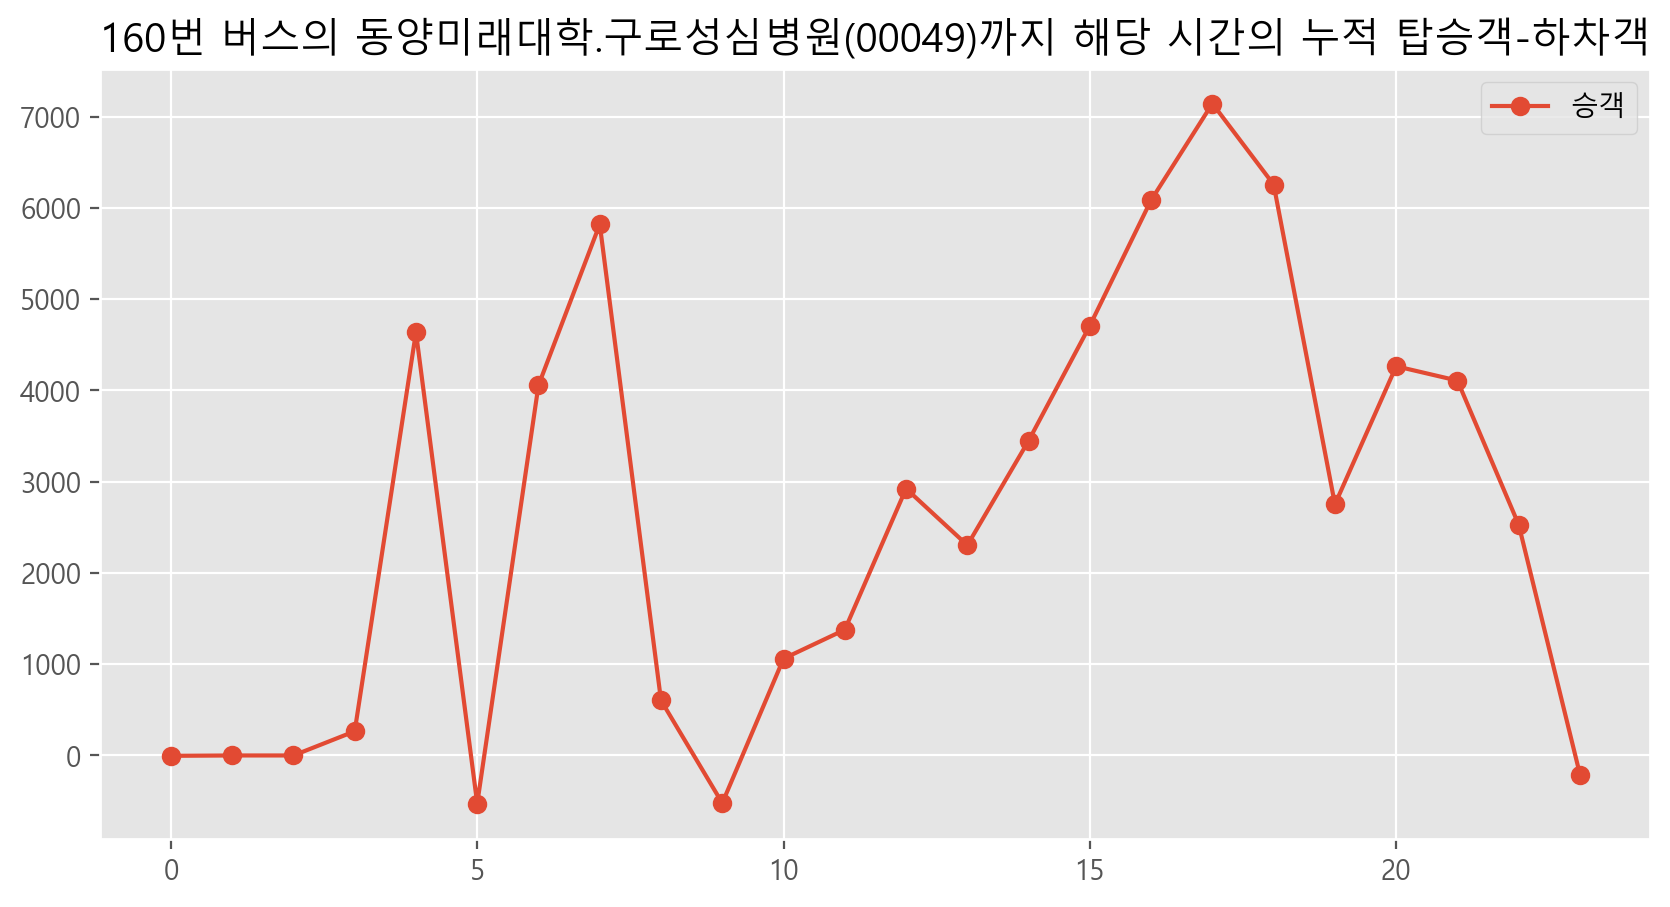

In [23]:
print(busnum)
selbus = input("선택할 버스 번호를 입력하세요.")
selstation = input("선택할 정류장 이름을 입력하세요.")
# 키 값의 일부로 키 선택하기
selected_keys = {value for key, value in StationKorean[selbus].items() if selstation in key}
# 예제 딕셔너리

# 값을 기준으로 키를 찾기
keys_with_value = [key for key, value in StationKorean[selbus].items() if value in selected_keys]

# 검색 결과 출력
print(f"검색 결과가 {len(keys_with_value)}개 있습니다.")
for num, val in enumerate(keys_with_value):
    print(f"{num+1}. {val}")
# print(keys_with_value)
sel = int(input("번호로 선택하세요."))-1

selstation = keys_with_value[sel]

selected_keys = {num for num, (key, value) in enumerate(StationKorean[selbus].items()) if selstation in key}
stationIndex = selected_keys.pop()
# print(type(stationLine))

plt.figure(figsize=(10,5))
plt.plot(range(0,24),(Cumsum_Bus[selbus][stationIndex,0::2]-Cumsum_Bus[selbus][stationIndex,1::2]), '-o', label = '승객')
plt.legend()
plt.title(f"{selbus}번 버스의 {selstation}까지 해당 시간의 누적 탑승객-하차객")
plt.show()

검색 결과가 2개 있습니다.
1. 동양미래대학.구로성심병원(00049)
2. 동양미래대학.구로성심병원(00069)


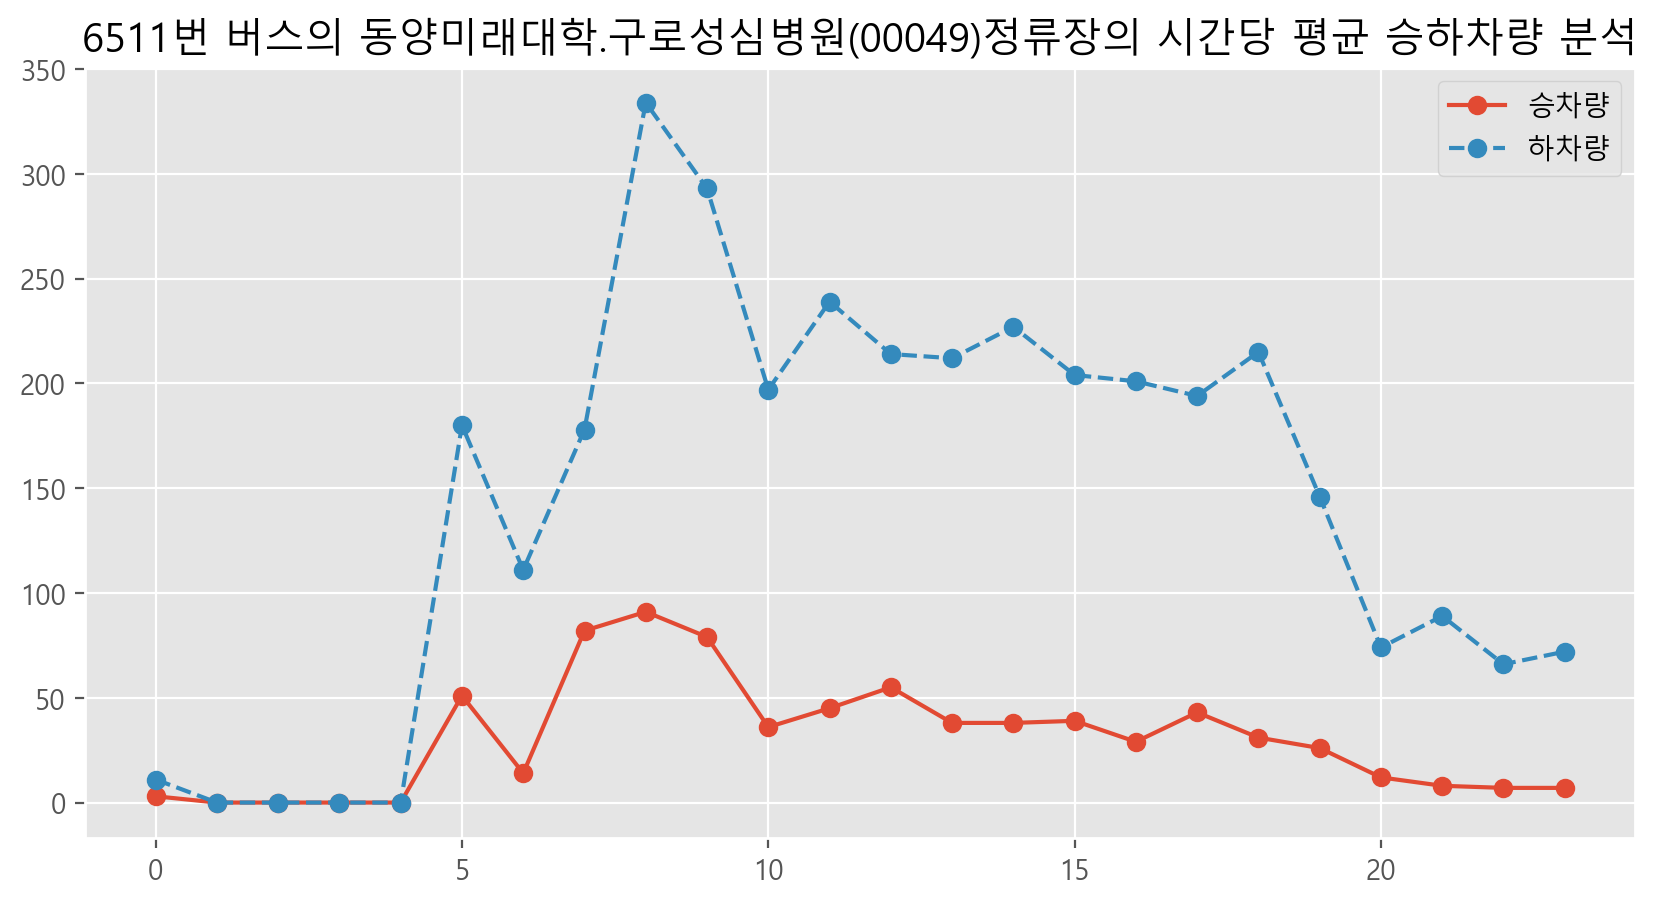

In [24]:
selbus = input("선택할 버스 번호를 입력하세요.")
selstation = input("선택할 정류장 이름을 입력하세요.")


print(f"검색 결과가 {len(keys_with_value)}개 있습니다.")
for num, val in enumerate(keys_with_value):
    print(f"{num+1}. {val}")
# print(keys_with_value)
sel = int(input("번호로 선택하세요."))-1
selstation = keys_with_value[sel]
plt.figure(figsize=(10,5))
plt.title(f"{selbus}번 버스의 {selstation}정류장의 시간당 평균 승하차량 분석")
plt.plot(range(24), BusAryDict[selbus][stationIndex][0::2], '-o', label = '승차량')
plt.plot(range(24), BusAryDict[selbus][stationIndex][1::2], '--o', label = '하차량')
plt.legend()
plt.show()

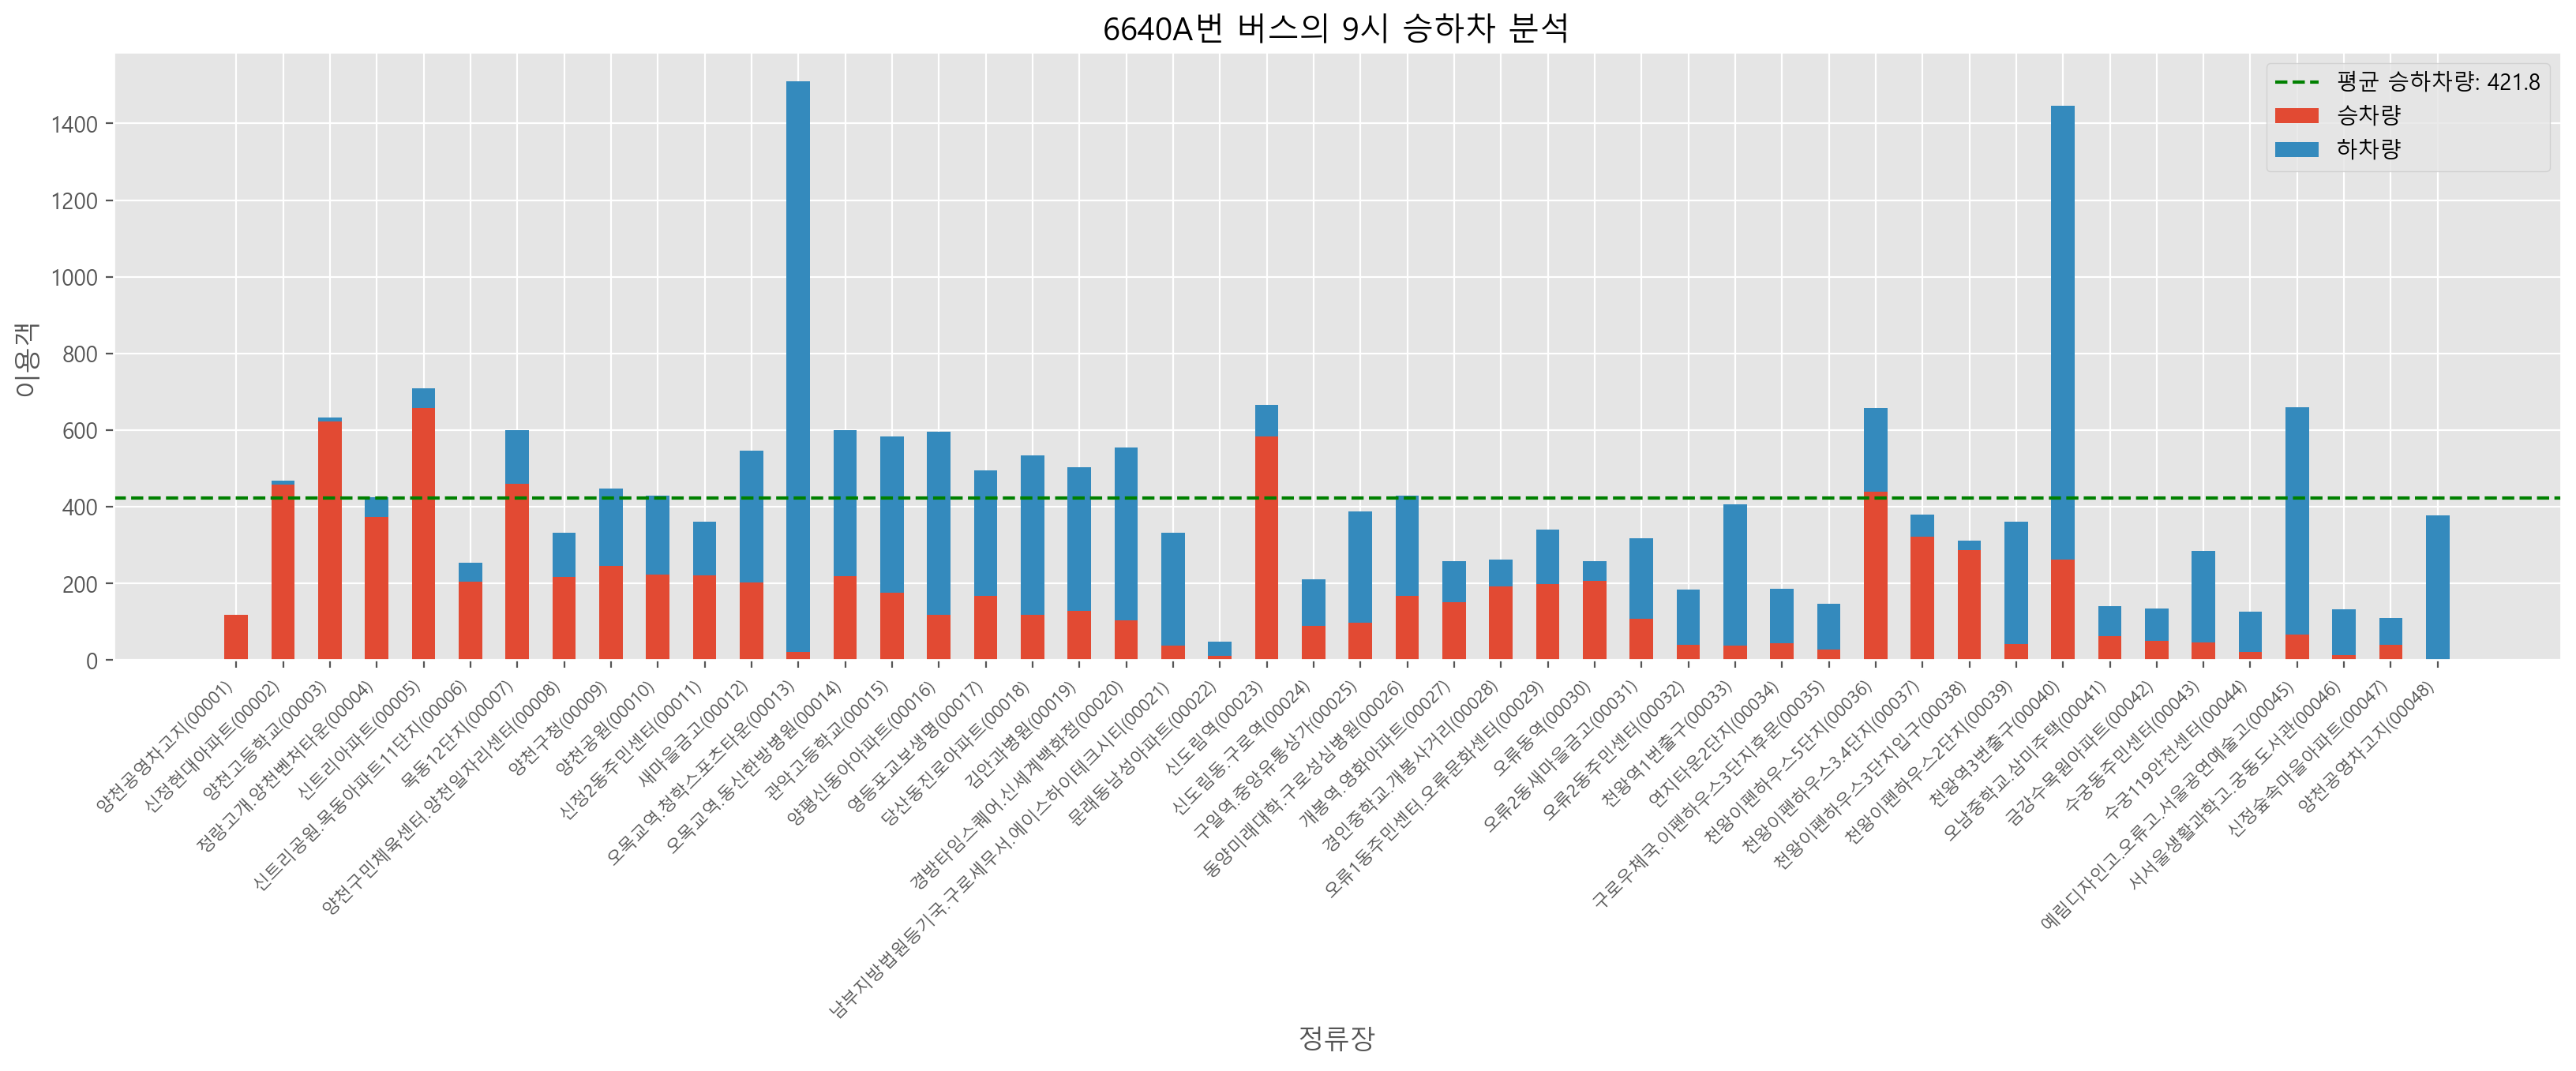

In [25]:
def findride(val):
    return val*2

def findleft(val):
    return (val*2)-1

selbus = input("선택할 버스 번호를 입력하세요.")
seltime = int(input("선택할 시간을 입력하세요 (0~23)"))
getGetOnindex = BusAryDict[selbus][:,findride(seltime)]
getGetOffindex = BusAryDict[selbus][:,findleft(seltime)]
getStationNames = [row[5] for row in busdict[selbus]]

meanGetOnOff = np.mean(getGetOnindex+getGetOffindex)
x = np.arange(len(getStationNames))
fig, ax = plt.subplots(figsize = (20,5))
ax.bar(x, getGetOnindex, width=0.5, label = '승차량')
ax.bar(x, getGetOffindex, width=0.5,bottom = getGetOnindex, label = '하차량' )

ax.axhline(meanGetOnOff, color='green', linestyle='--', label=f'평균 승하차량: {meanGetOnOff:.1f}')
ax.set_ylabel('이용객')
ax.set_xlabel('정류장')
ax.set_title(f'{selbus}번 버스의 {seltime}시 승하차 분석')
ax.set_xticks(x)
ax.set_xticklabels(getStationNames , rotation=45, ha='right', fontsize=8)
ax.legend()
plt.show()


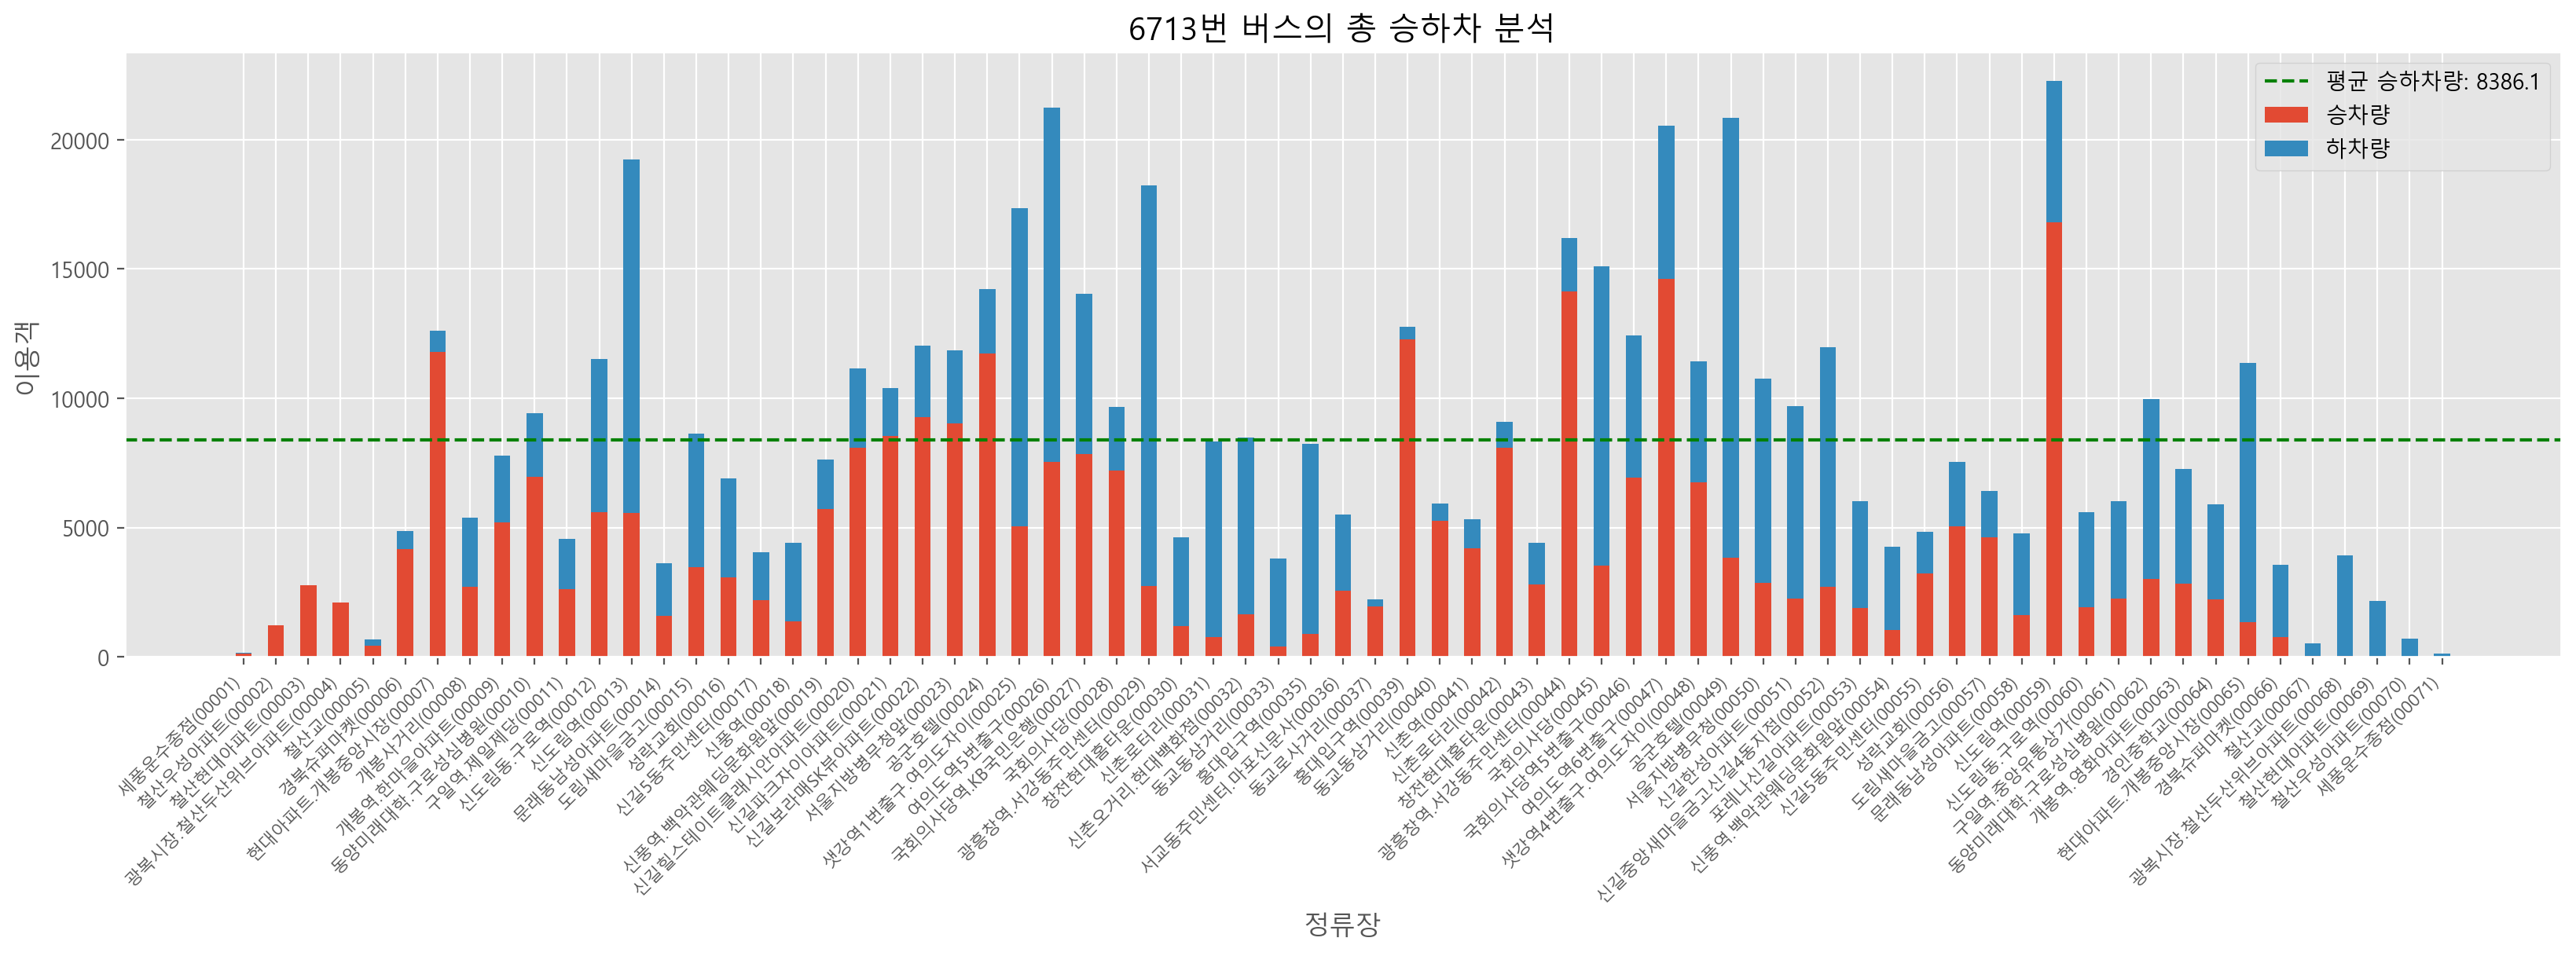

In [26]:
selbus = input("선택할 버스 번호를 입력하세요.")
allRide = np.sum(BusAryDict[selbus][:,:-1:2],axis=1)
allleft = np.sum(BusAryDict[selbus][:,1::2],axis=1)
getStationNames = [row[5] for row in busdict[selbus]]
x = np.arange(len(getStationNames))
fig, ax = plt.subplots(figsize = (20,5))
ax.bar(x, allRide, width=0.5, label = '승차량')
ax.bar(x, allleft, width=0.5,bottom = allRide, label = '하차량' )

meanallRideLeft = np.mean(allRide+allleft)

ax.axhline(meanallRideLeft, color='green', linestyle='--', label=f'평균 승하차량: {meanallRideLeft:.1f}')
ax.set_xlabel('정류장')
ax.set_ylabel('이용객')
ax.set_title(f'{selbus}번 버스의 총 승하차 분석')

ax.set_xticks(x)
ax.set_xticklabels(getStationNames , rotation=45, ha='right', fontsize=8)
ax.legend()
plt.show()

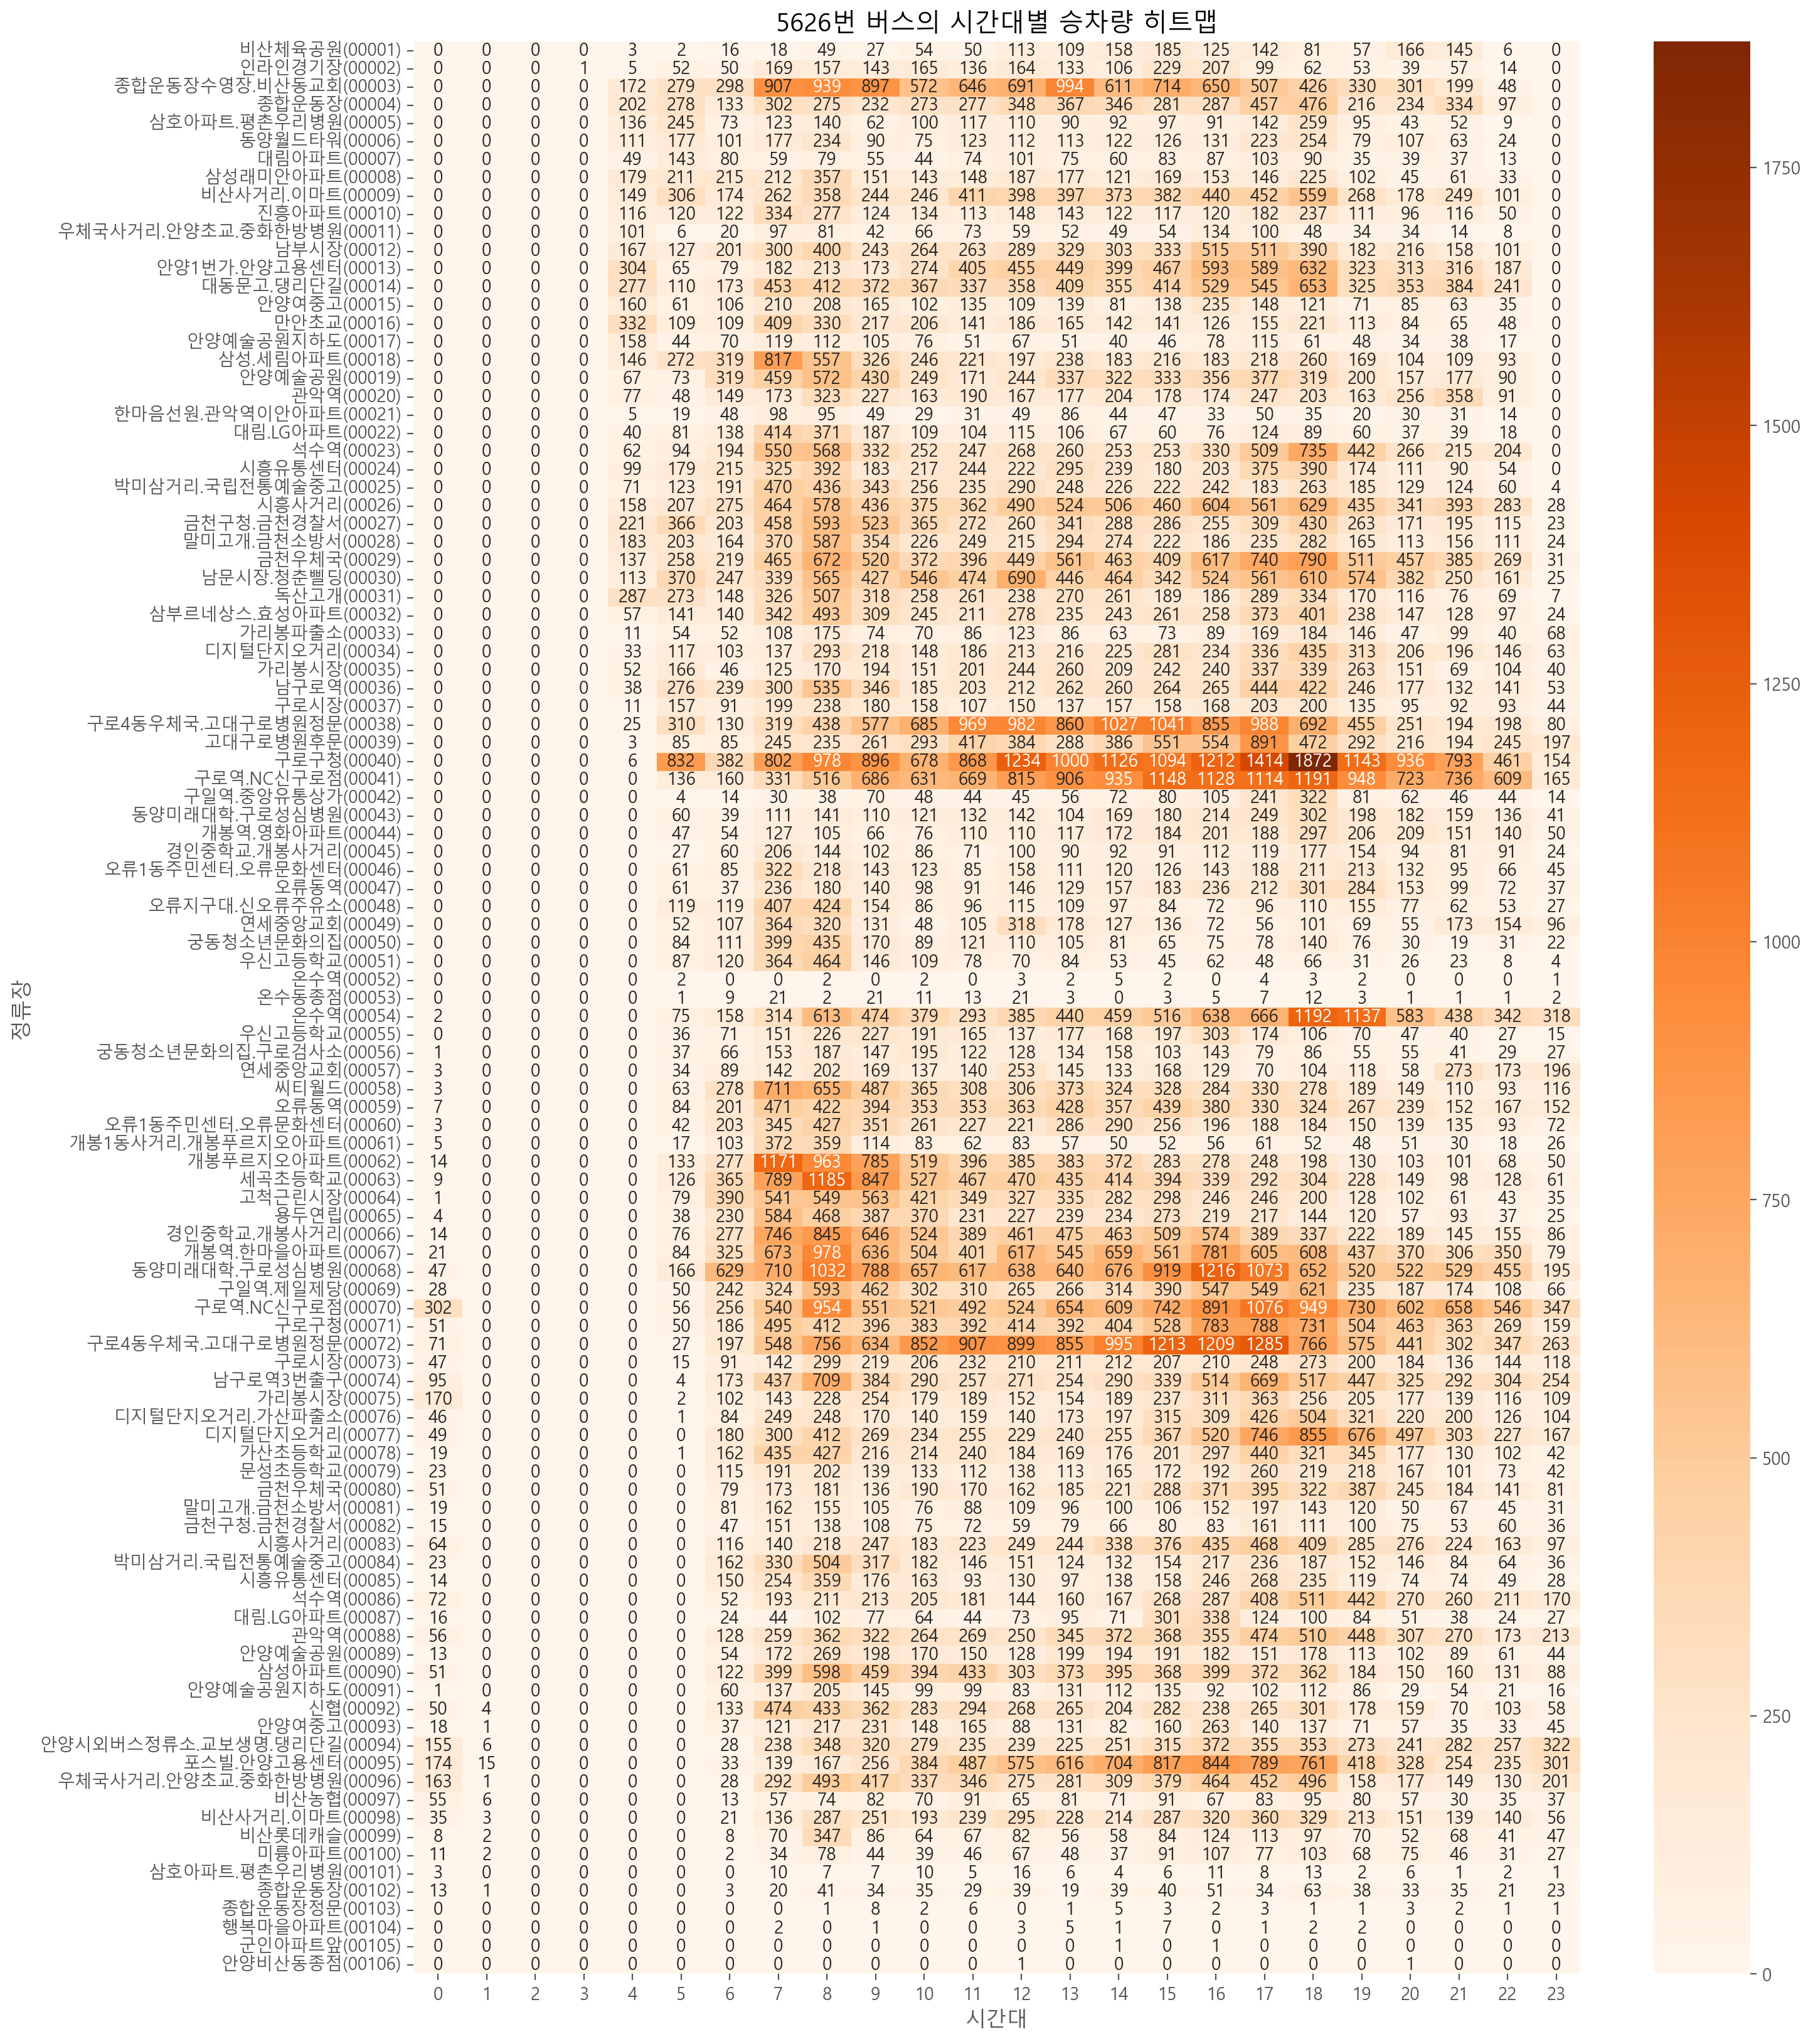

In [35]:
import seaborn as sns
import numpy as np

selbus = input("선택할 버스 번호를 입력하세요.")
# 예시 데이터 (시간대 x 정류장)
HitMapData = BusAryDict[selbus][:, :-1:2]  # 24시간, 4개 정류장
getStationNames = [row[5] for row in busdict[selbus]]
# print(getStationNames)
plt.figure(figsize=(15, 20))
sns.heatmap(HitMapData, annot=True, cmap="Oranges", fmt="d", yticklabels=getStationNames, xticklabels=np.arange(0,24))
plt.title(f'{selbus}번 버스의 시간대별 승차량 히트맵')

plt.xlabel('시간대')
plt.ylabel('정류장')
plt.show()


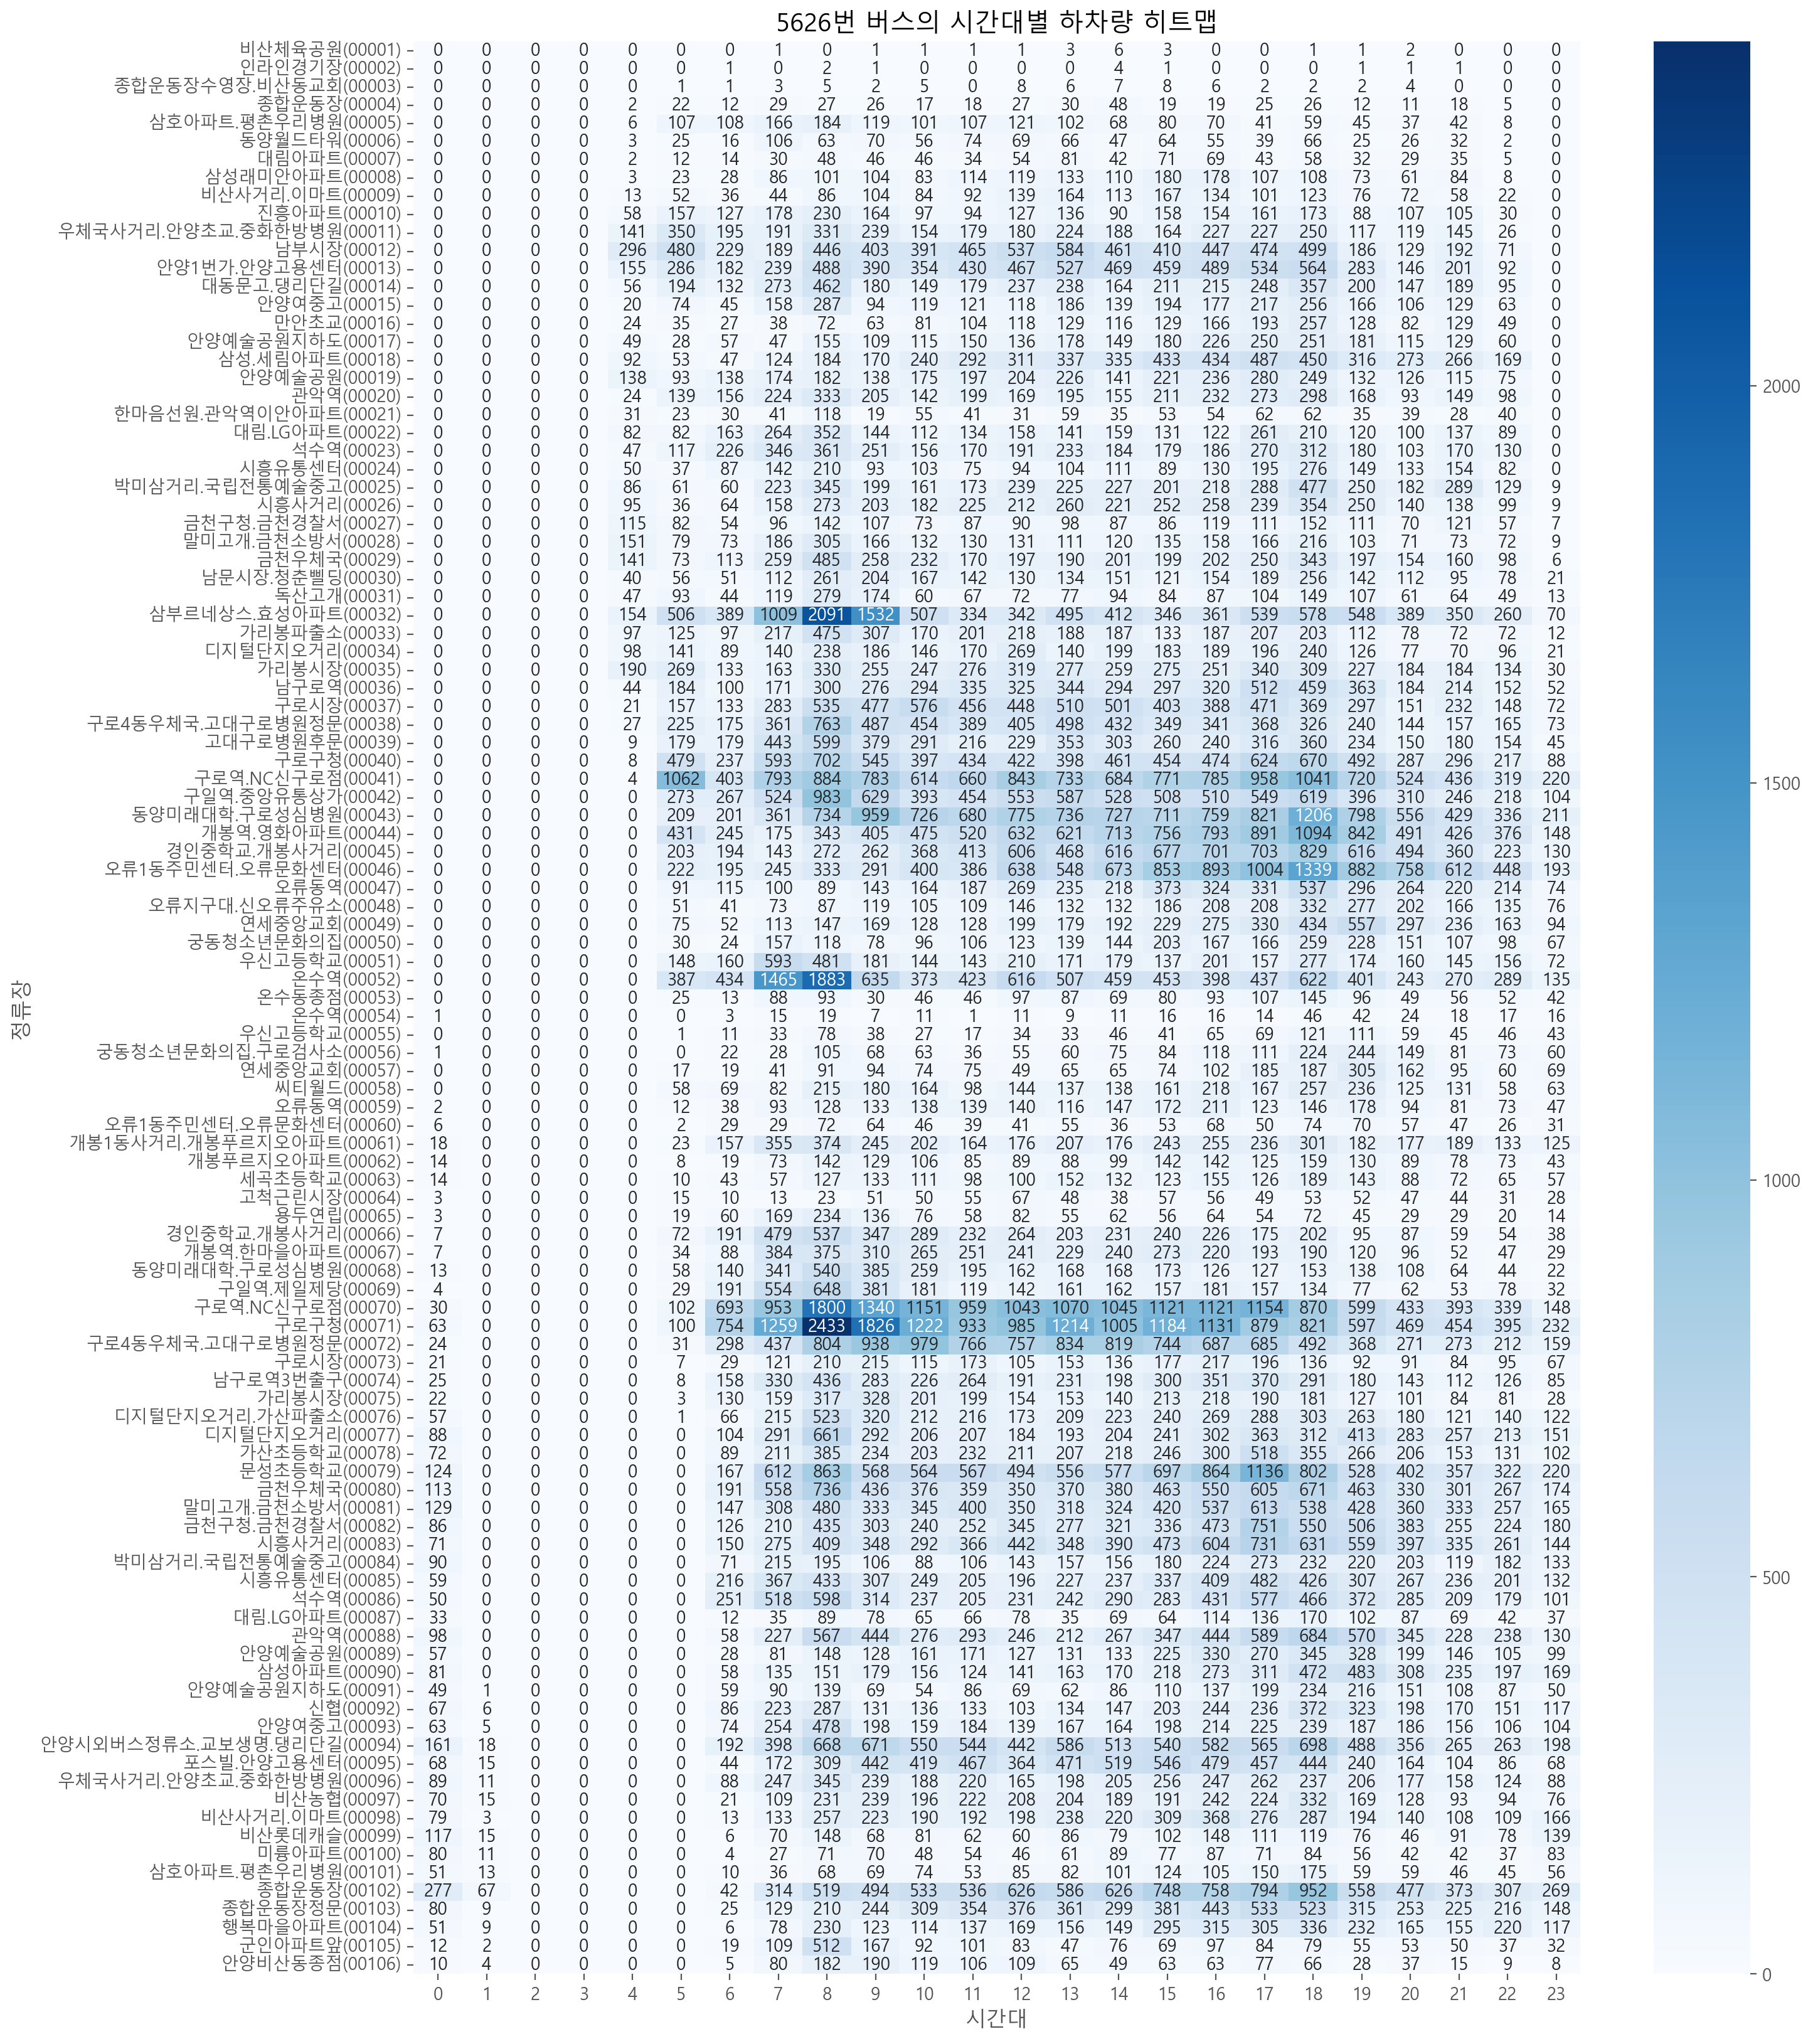

In [36]:
import seaborn as sns
import numpy as np

selbus = input("선택할 버스 번호를 입력하세요.")
# 예시 데이터 (시간대 x 정류장)
HitMapData = BusAryDict[selbus][:, 1::2]  # 24시간, 4개 정류장
getStationNames = [row[5] for row in busdict[selbus]]
# print(getStationNames)
plt.figure(figsize=(15, 20))
sns.heatmap(HitMapData, annot=True, cmap="Blues", fmt="d", yticklabels=getStationNames, xticklabels=np.arange(0,24))
plt.title(f'{selbus}번 버스의 시간대별 하차량 히트맵')

plt.xlabel('시간대')
plt.ylabel('정류장')
plt.show()


## 가장 이용객이 적은 정류장

In [29]:
#cumsum한거에 min 찾으면 되지 않을까?
selbus = input("선택할 버스 번호를 입력하세요.")
allRideHap = np.sum(BusAryDict[selbus][:,:-1:2],axis=1) + np.sum(BusAryDict[selbus][:,1::2],axis=1)
# print(allRideHap)
# print(allRideHap)
minRideleft = min(allRideHap)
getminindex = [i for i, val in enumerate(allRideHap) if val == minRideleft][0]
# print(getminindex)
# print(minRideleft)


MinUseStop = busdict[selbus][getminindex][5]

print(f"{selbus}번 버스의 정류장 중 가장 이용객이 적은 정류장: {MinUseStop}")

5626번 버스의 정류장 중 가장 이용객이 적은 정류장: 안양비산동종점(00106)


## 가장 이용객이 많은 정류장

In [30]:
#cumsum한거에 min 찾으면 되지 않을까?
selbus = input("선택할 버스 번호를 입력하세요.")
allRideHap = np.sum(BusAryDict[selbus][:,:-1:2],axis=1) + np.sum(BusAryDict[selbus][:,1::2],axis=1)
# print(allRideHap)
# print(allRideHap)
maxUse = max(allRideHap)
getmaxindex = [i for i, val in enumerate(allRideHap) if val == maxUse][0]
# print(getminindex)
# print(minRideleft)


MaxUseStop = busdict[selbus][getmaxindex][5]

print(f"{selbus}번 버스의 정류장 중 가장 이용객이 많은 정류장: {MaxUseStop}, {maxUse}명")

5626번 버스의 정류장 중 가장 이용객이 많은 정류장: 구로역.NC신구로점(00070), 28364명


## 가장 승차랑이 많은 정류장

In [31]:
#cumsum한거에 min 찾으면 되지 않을까?
selbus = input("선택할 버스 번호를 입력하세요.")
allRideHap = np.sum(BusAryDict[selbus][:,:-1:2],axis=1)
# print(allRideHap)
# print(allRideHap)
maxUse = max(allRideHap)
getmaxindex = [i for i, val in enumerate(allRideHap) if val == maxUse][0]
# print(getminindex)
# print(minRideleft)


Maxridestop = busdict[selbus][getmaxindex][5]

print(f"{selbus}번 버스의 정류장 중 가장 탑승객이 많은 정류장: {Maxridestop}, {maxUse}명")

5626번 버스의 정류장 중 가장 탑승객이 많은 정류장: 구로구청(00040), 17881명


## 가장 하차량이 많은 정류장

In [32]:
#cumsum한거에 min 찾으면 되지 않을까?
selbus = input("선택할 버스 번호를 입력하세요.")
allleftHap = np.sum(BusAryDict[selbus][:,1::2],axis=1)
# print(allRideHap)
# print(allRideHap)
maxUse = max(allleftHap)
getmaxindex = [i for i, val in enumerate(allleftHap) if val == maxUse][0]
# print(getminindex)
# print(minRideleft)


MaxleftStop = busdict[selbus][getmaxindex][5]

print(f"{selbus}번 버스의 정류장 중 가장 하차객이 많은 정류장: {MaxleftStop}, {maxUse}명")

5626번 버스의 정류장 중 가장 하차객이 많은 정류장: 구로구청(00071), 17956명


# 대부분의 경우 기점과 종점이 나와서 큰 의미 없음

## 가장 승차량이 적은 정류장

In [33]:
#종점은 다 내리기만 하니까 제외를 해야지?
selbus = input("선택할 버스 번호를 입력하세요.")
allRideHap = np.sum(BusAryDict[selbus][:,:-1:2],axis=1)[:-1]
# print(allRideHap)
# print(allRideHap)
minUse = min(allRideHap)
getminindex = [i for i, val in enumerate(allRideHap) if val == minUse][0]
# print(getminindex)
# print(minRideleft)


MinRideStop = busdict[selbus][getminindex][5]

print(f"{selbus}번 버스의 정류장 중 가장 승차량이 적은 정류장: {MinRideStop}")

5626번 버스의 정류장 중 가장 승차량이 적은 정류장: 군인아파트앞(00105)


## 가장 하차량이 적은 정류장

In [34]:
#기점은 다 내리기만 하니까 제외를 해야지?
selbus = input("선택할 버스 번호를 입력하세요.")
allLeftHap = np.sum(BusAryDict[selbus][:,1::2],axis=1)
# print(allRideHap)
# print(allRideHap)
minUse = np.min(allLeftHap[allLeftHap != 0])
# print(minUse)
getminindex = [i for i, val in enumerate(allLeftHap) if val == minUse][0]
# print(getminindex)
# print(minRideleft)


MinLeftStop = busdict[selbus][getminindex][5]

print(f"{selbus}번 버스의 정류장 중 가장 하차량이 적은 정류장: {MinLeftStop}")

5626번 버스의 정류장 중 가장 하차량이 적은 정류장: 인라인경기장(00002)
